In [37]:
#######################
# standard code block #
#######################
# Necessary imports
import pandas as pd
import numpy as np
import seaborn as sns
import patsy
import scipy.stats as stats

import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline
# see https://ipython.readthedocs.io/en/stable/interactive/magics.html
import pickle

In [38]:
with open('book_movie.pkl', 'rb') as f:
    book_movie_data = pickle.load(f)

In [64]:
#len(book_movie_data[book_movie_data.budget == 0])/len(book_movie_data)

In [59]:
book_movie_data.isnull().sum()

book_title                 0
book_rating                0
book_number_rating         0
book_year_published        1
adult                      0
belongs_to_collection    629
budget                     0
genres                     0
homepage                 525
id                         0
imdb_id                    0
original_language          0
original_title             0
overview                   0
popularity                 0
poster_path                0
production_companies       0
production_countries       0
release_date               0
revenue                    0
runtime                    0
spoken_languages           0
status                     0
tagline                  175
title                      0
video                      0
vote_average               0
vote_count                 0
dtype: int64

In [40]:
book_movie_data['popularity']=pd.to_numeric(book_movie_data['popularity'])

In the course of investigation, saw a trend of missing budget and revenue numbers. To keep the majority of the dataset, decided to focus on ratings and preferences instead of the money aspect of the movies.

In [41]:
#pairing down the features to those of most interest, numerical.


bk_mv = book_movie_data.loc[:,['book_title', 'book_rating', 'book_number_rating', 
                      'book_year_published', 'title', 'vote_average', 
                      'vote_count', 'budget', 'runtime', 
                      'release_date','revenue', 'popularity']]

In [42]:
bk_mv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 705 entries, 0 to 704
Data columns (total 12 columns):
book_title             705 non-null object
book_rating            705 non-null float64
book_number_rating     705 non-null object
book_year_published    704 non-null object
title                  705 non-null object
vote_average           705 non-null float64
vote_count             705 non-null float64
budget                 705 non-null int64
runtime                705 non-null float64
release_date           705 non-null object
revenue                705 non-null float64
popularity             705 non-null float64
dtypes: float64(6), int64(1), object(5)
memory usage: 71.6+ KB


In [80]:
with open('bk_mv.pkl', 'wb') as f:
    pickle.dump(bk_mv, f)

In [43]:
bk_mv.to_pickle('bk_mv_df_pickle.pkl')

In [44]:
bk_mv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 705 entries, 0 to 704
Data columns (total 12 columns):
book_title             705 non-null object
book_rating            705 non-null float64
book_number_rating     705 non-null object
book_year_published    704 non-null object
title                  705 non-null object
vote_average           705 non-null float64
vote_count             705 non-null float64
budget                 705 non-null int64
runtime                705 non-null float64
release_date           705 non-null object
revenue                705 non-null float64
popularity             705 non-null float64
dtypes: float64(6), int64(1), object(5)
memory usage: 71.6+ KB


In [45]:
bk_mv.describe()

,book_rating,vote_average,vote_count,budget,runtime,revenue,popularity
count,705.000000,705.000000,705.000000,7.050000e+02,705.000000,7.050000e+02,705.000000
mean,3.922128,6.326383,584.551773,1.840347e+07,113.280851,5.917364e+07,7.955678
std,0.222584,1.222417,1154.862931,3.419483e+07,33.718091,1.370832e+08,9.574959
min,3.080000,0.000000,0.000000,0.000000e+00,25.000000,0.000000e+00,0.001459
25%,3.800000,5.900000,19.000000,0.000000e+00,95.000000,0.000000e+00,2.290681
50%,3.940000,6.500000,121.000000,2.264080e+05,108.000000,0.000000e+00,6.764056
75%,4.060000,7.000000,610.000000,2.500000e+07,125.000000,5.087714e+07,10.673296
max,4.560000,10.000000,9678.000000,2.500000e+08,386.000000,1.025491e+09,154.801009


In [46]:
bk_mv.corr()

,book_rating,vote_average,vote_count,budget,runtime,revenue,popularity
book_rating,1.000000,0.206703,0.202751,0.119831,-0.005385,0.171653,0.080529
vote_average,0.206703,1.000000,0.272046,0.099657,0.001977,0.158091,0.247619
vote_count,0.202751,0.272046,1.000000,0.603412,0.109464,0.747391,0.645435
budget,0.119831,0.099657,0.603412,1.000000,0.121404,0.753144,0.375680
runtime,-0.005385,0.001977,0.109464,0.121404,1.000000,0.113938,0.069944
revenue,0.171653,0.158091,0.747391,0.753144,0.113938,1.000000,0.447011
popularity,0.080529,0.247619,0.645435,0.375680,0.069944,0.447011,1.000000


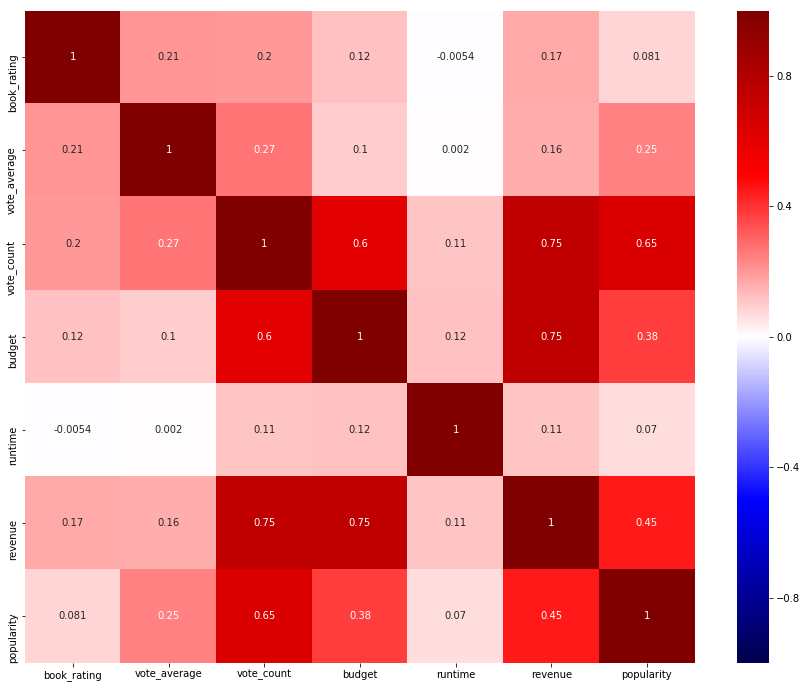

In [47]:
plt.figure(figsize = (15,12))

sns.heatmap(bk_mv.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

In [ ]:
sns.pairplot(bk_mv, kind = 'scatter')

In [48]:
# Create your feature matrix (X) and target vector (y)
y, X = patsy.dmatrices('revenue ~ book_rating + budget + runtime + vote_count + vote_average', data=bk_mv, return_type="dataframe")

# Create your model
model = sm.OLS(y, X)

# Fit your model to your training set
fit = model.fit()

# Print summary statistics of the model's performance
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     331.0
Date:                Thu, 11 Apr 2019   Prob (F-statistic):          1.49e-181
Time:                        13:57:51   Log-Likelihood:                -13781.
No. Observations:                 705   AIC:                         2.757e+04
Df Residuals:                     699   BIC:                         2.760e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -5.816e+07   5.23e+07     -1.113      0.266   -1.61e+08    4.45e+07
book_rating   1.573e+07   1.31e+07      1.197      0.232   -1.01e+07    4.15e+07
budget           1.8951      0.104     18.181      0.000       1.690       2.100
runtime       2.514e+04   8.46e+04      0.297      0.766   -1.41e+05    1.91e+05
vote_count    5.481e+04   3210.902     17.069      0.000    4.85e+04    6.11e+04
vote_average -2.234e+06   2.44e+06     -0.914      0.361   -7.03e+06    2.56e+06
==============================================================================
Omnibus:                      359.081   Durbin-Watson:                   1.805
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8206.549
Skew:                           1.766   Prob(JB):                         0.00
Kurtosis:                      19.337   Cond. No.                     7.38e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.38e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [35]:
lr = LinearRegression()
fit = lr.fit(X,y)

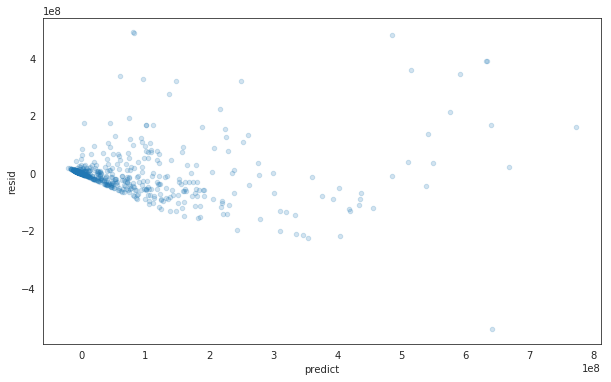

In [36]:
bk_mv['predict'] = fit.predict(X)
bk_mv['resid'] = bk_mv.revenue-bk_mv.predict
with sns.axes_style('white'):
    plot=bk_mv.plot(kind='scatter',
                  x='predict',y='resid',alpha=0.2,figsize=(10,6))